# Correlation tested by permutation

In [1]:
# Import numerical, data and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Only show 6 decimals when printing
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
psychos = pd.read_csv('psycho_students.csv')
psychos

,psychopathy,clammy,university
0,11.416,0.389,Berkeley
1,4.514,0.200,Berkeley
2,12.204,0.241,Berkeley
3,14.835,0.463,Berkeley
4,8.416,4.585,Stanford
5,6.563,1.097,Stanford
6,17.343,1.642,Stanford
7,13.020,4.972,Stanford
8,15.190,7.957,MIT
9,11.902,5.585,MIT


In [4]:
psychopathy = psychos['psychopathy']
clammy = psychos['clammy']

In [5]:
np.corrcoef(psychopathy, clammy)

array([[1.    , 0.5179],
       [0.5179, 1.    ]])

In [6]:
actual_corr = np.corrcoef(psychopathy, clammy)[0, 1]
actual_corr

0.5178777312914012

In [7]:
clammy_copy = list(clammy)
clammy_copy

[0.389,
 0.2,
 0.24100000000000002,
 0.46299999999999997,
 4.585,
 1.097,
 1.642,
 4.9719999999999995,
 7.957000000000001,
 5.585,
 5.527,
 6.9639999999999995]

In [8]:
from random import shuffle
shuffle(clammy_copy)
clammy_copy

[0.24100000000000002,
 4.9719999999999995,
 4.585,
 6.9639999999999995,
 1.642,
 0.46299999999999997,
 0.2,
 7.957000000000001,
 5.585,
 5.527,
 0.389,
 1.097]

In [9]:
fake_correlations = []
for i in range(10000):
    shuffle(clammy_copy)
    fake_corr = np.corrcoef(psychopathy, clammy_copy)[0, 1]
    fake_correlations.append(fake_corr)

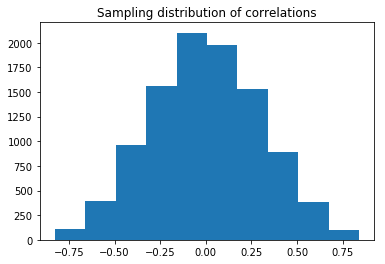

In [10]:
plt.hist(fake_correlations)
plt.title("Sampling distribution of correlations");

In [11]:
# We will count the number of fake_differences <= our observed
np.sum(np.array(fake_correlations) >= actual_corr) / 10000

0.0431